In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline

In [3]:
train_data = pd.read_csv('socal2.csv')
test_data = pd.read_csv('socal2.csv')
train_data.head()

,image_id,street,citi,n_citi,bed,bath,sqft,price
0,0,1317 Van Buren Avenue,"Salton City, CA",317,3,2.0,1560,201900
1,1,124 C Street W,"Brawley, CA",48,3,2.0,713,228500
2,2,2304 Clark Road,"Imperial, CA",152,3,1.0,800,273950
3,3,755 Brawley Avenue,"Brawley, CA",48,3,1.0,1082,350000
4,4,2207 R Carrillo Court,"Calexico, CA",55,4,3.0,2547,385100


In [4]:
train_data.describe()

,image_id,n_citi,bed,bath,sqft,price
count,15474.000000,15474.000000,15474.000000,15474.000000,15474.000000,1.547400e+04
mean,7736.500000,216.597518,3.506398,2.453251,2173.913209,7.031209e+05
std,4467.103368,112.372985,1.034838,0.958742,1025.339617,3.769762e+05
min,0.000000,0.000000,1.000000,0.000000,280.000000,1.950000e+05
25%,3868.250000,119.000000,3.000000,2.000000,1426.000000,4.450000e+05
50%,7736.500000,222.500000,3.000000,2.100000,1951.000000,6.390000e+05
75%,11604.750000,315.000000,4.000000,3.000000,2737.750000,8.349750e+05
max,15473.000000,414.000000,12.000000,36.000000,17667.000000,2.000000e+06


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   street    15474 non-null  object 
 2   citi      15474 non-null  object 
 3   n_citi    15474 non-null  int64  
 4   bed       15474 non-null  int64  
 5   bath      15474 non-null  float64
 6   sqft      15474 non-null  int64  
 7   price     15474 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 967.2+ KB


In [6]:
train_data.shape

(15474, 8)

In [7]:
train_data.sample(3).T

,4783,11359,12477
image_id,4783,11359,12477
street,5352 Hendricksen Drive,3707 Hickory Way,2658 Coronado Pl
citi,"Huntington Beach, CA","Oceanside, CA","Vista, CA"
n_citi,148,256,394
bed,5,2,3
bath,3.0,2.0,2.0
sqft,2620,1106,1945
price,949000,395000,685000


In [9]:
train_data.columns

Index(['image_id', 'street', 'citi', 'n_citi', 'bed', 'bath', 'sqft', 'price'], dtype='object')

# Finding the strongest correlations between 'price and the other columns 

In [10]:
corr_matrix = train_data.corr()
top_correlated_features =corr_matrix.index
corr_matrix['price'].sort_values(ascending= False)

price       1.000000
sqft        0.583457
bath        0.477735
bed         0.348711
image_id    0.094821
n_citi      0.047169
Name: price, dtype: float64

<AxesSubplot:>

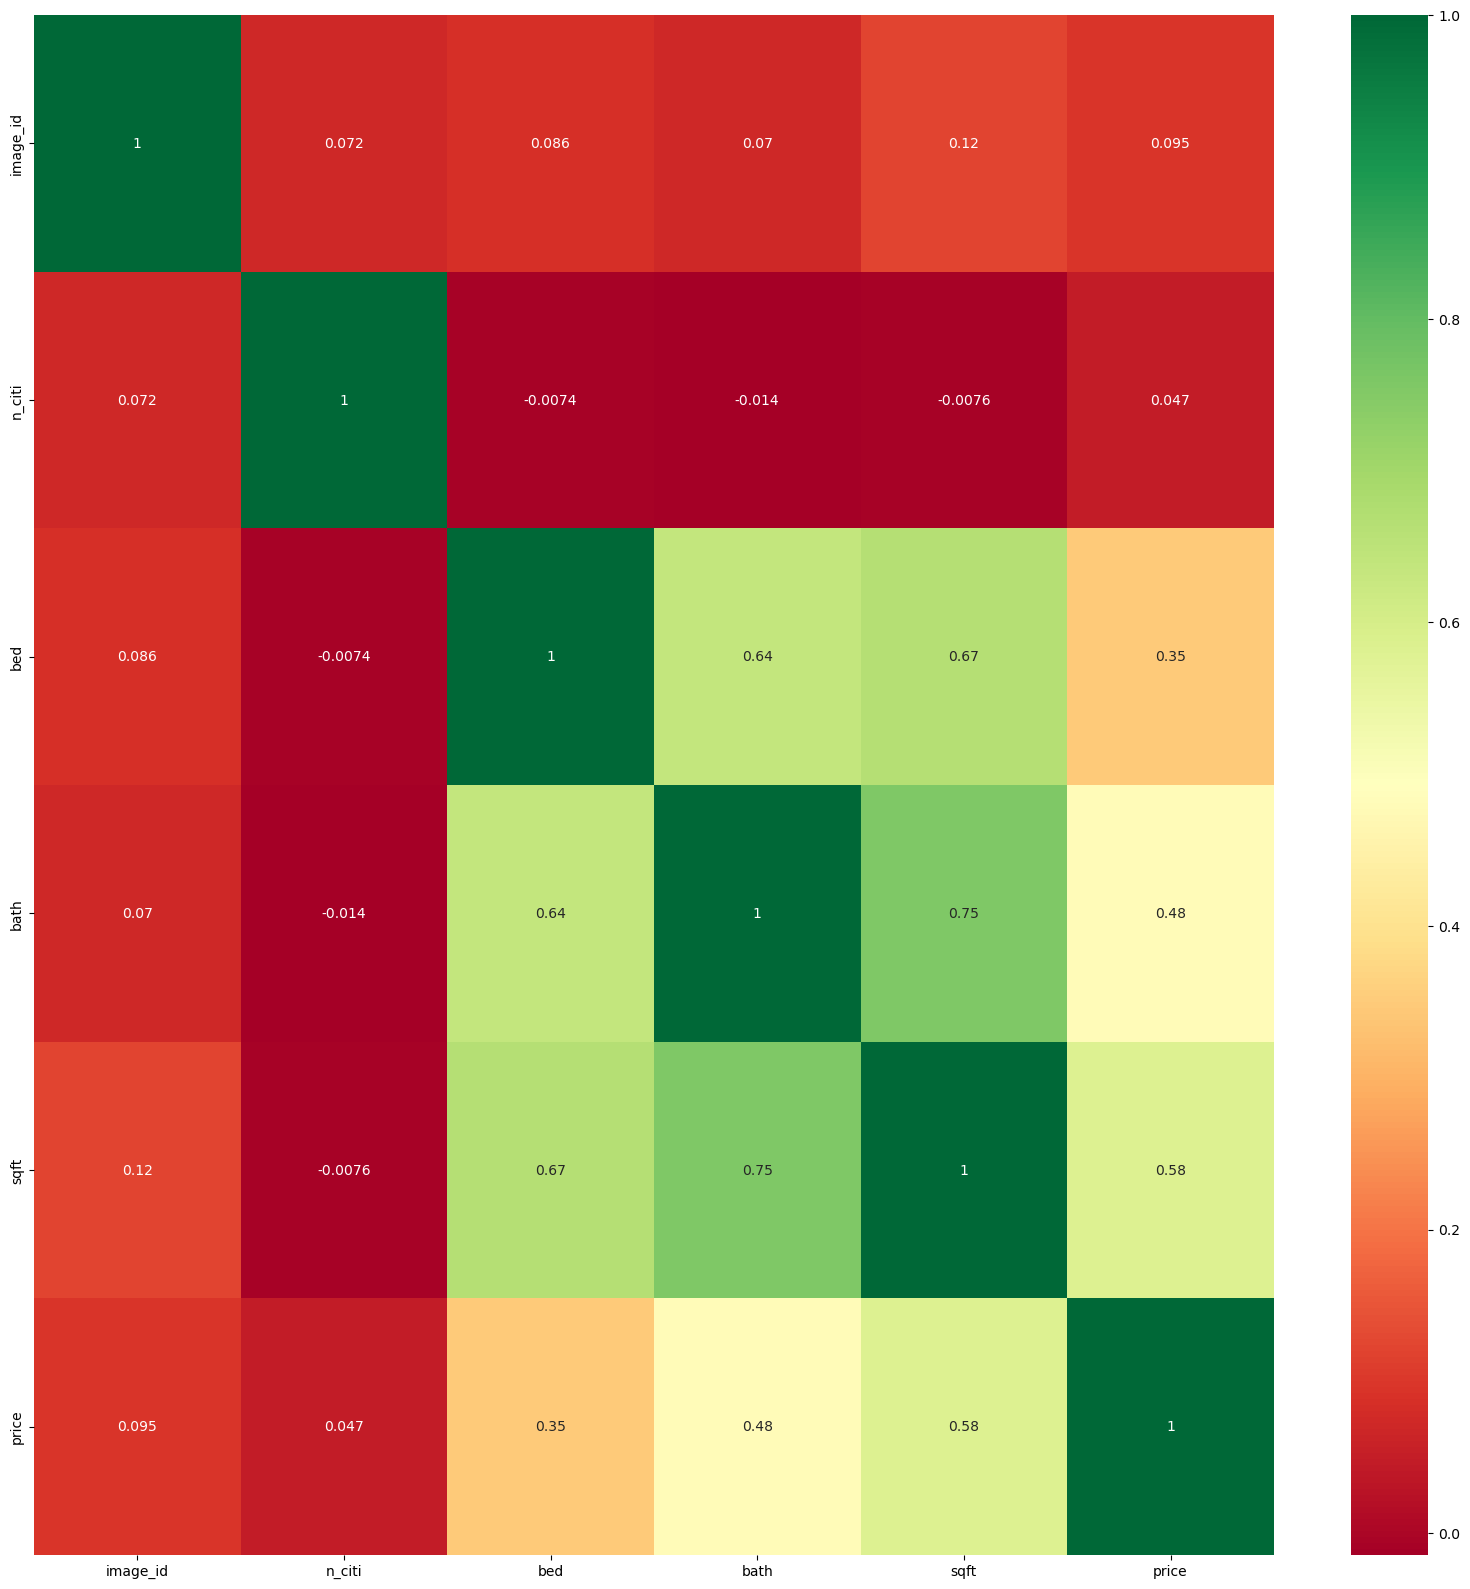

In [11]:
plt.figure(figsize = (20,20))
sns.heatmap(train_data[top_correlated_features].corr(), annot = True, cmap ='RdYlGn')

In [12]:
price_tag = train_data['price']
train_data = train_data.drop('price', axis =1)
train_data.shape

(15474, 7)

# Cleaning up empty data values

In [16]:
housing_num = train_data.select_dtypes(include = ['float', 'int64'])
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  int64  
 1   n_citi    15474 non-null  int64  
 2   bed       15474 non-null  int64  
 3   bath      15474 non-null  float64
 4   sqft      15474 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 604.6 KB


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='median') # filling in the missing values using the median
imputer.fit(housing_num)
imputer.statistics_
housing_num.median().values

array([7.7365e+03, 2.2250e+02, 3.0000e+00, 2.1000e+00, 1.9510e+03])

In [18]:
X = imputer.transform(housing_num)
housing_numm =pd.DataFrame(X , columns = housing_num.columns)
housing_numm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  float64
 1   n_citi    15474 non-null  float64
 2   bed       15474 non-null  float64
 3   bath      15474 non-null  float64
 4   sqft      15474 non-null  float64
dtypes: float64(5)
memory usage: 604.6 KB


# Seperating qualitative data from the quantitative

In [19]:
categories = train_data.select_dtypes(include = ['object'])
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   street  15474 non-null  object
 1   citi    15474 non-null  object
dtypes: object(2)
memory usage: 241.9+ KB


In [25]:
from sklearn.preprocessing import LabelEncoder
encoded = pd.DataFrame(columns = categories.columns , 
                       data = LabelEncoder().fit_transform(categories.values.flatten()).reshape(categories.shape))

In [26]:
encoded

,street,citi
0,1552,12717
1,1184,12447
2,4565,12551
3,10921,12447
4,4346,12454
...,...,...
15469,7949,12626
15470,8252,12772
15471,1332,12738
15472,7082,12652


In [27]:
prepared = pd.concat([housing_numm , encoded], axis = 1)

In [28]:
prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15474 entries, 0 to 15473
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   image_id  15474 non-null  float64
 1   n_citi    15474 non-null  float64
 2   bed       15474 non-null  float64
 3   bath      15474 non-null  float64
 4   sqft      15474 non-null  float64
 5   street    15474 non-null  int32  
 6   citi      15474 non-null  int32  
dtypes: float64(5), int32(2)
memory usage: 725.5 KB


In [30]:
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self , feature_names):
        self._feature_names = feature_names
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, X , y =None):
        return X[self._feature_names]

In [31]:
### Create a pipeline  then change the label encoder into one hot encoders
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

num_attributes = list(housing_num)
categorical_atrributes = list(categories)

num_pipeline = Pipeline( steps = [
    ('selector', FeatureSelector(num_attributes)),
    ('imputer', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler()),
])
categorical_transformer = Pipeline(steps=[
('imputer', SimpleImputer(strategy='most_frequent')),
('imput', OneHotEncoder(handle_unknown='ignore'))
])


full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', categorical_transformer)
])




In [32]:
pipelined = full_pipeline.fit_transform(train_data)

# Training the data with the library provided Gradient Boosting Regressor function

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=15000, max_depth=4, min_samples_leaf=15, min_samples_split=10, learning_rate=0.01, loss='huber', random_state=5)

gbr.fit(pipelined , price_tag)

In [ ]:
from sklearn.metrics import mean_squared_error
price_predictions = gbr.predict(pipelined)
gbr_error = mean_squared_error(price_tag, price_predictions)
gbr_error_sqrt = np.sqrt(gbr_error)

In [ ]:
sns.distplot(gbr.predict(pipelined),kde=None)

In [ ]:
data = full_pipeline.transform(train_data.iloc[:5])
predictions = gbr.predict(data)
print("Predictions:" ,predictions )

In [ ]:
diff_in_labels = price_data.iloc[:5] - predictions
print("The difference between prediction and the actual prices:\t", diff_in_labels )

Our model's prediction accuracy comes up to:

In [ ]:
gbrt.score(pipelined , price_tag)